# XPCS Notebook 
This notebook demonstrates how to search and analyze data from Globus Search
 
## Key Features
- Authenticates with Globus using a native app client ID
- Performs advanced searches with custom filters
- Parses and processes search results
- Visualizes data using matplotlib

## Prerequisites
- globus_sdk installed
- h5py installed
- matplotlib installed
- Valid Globus client ID
- Access to Globus Search index

## Usage
1. Run cells sequentially to authenticate
2. Use make_query() to search data
3. Process results with parse_result_files()
4. Visualize data with matplotlib

## Examples

### Basic Search
```python
Search for all XPCS data
results = make_query("XPCS")
```

## Advanced Search with Filters
```python
Search for specific experiment data
results = make_query(
    query="milliron202503",
    field_name="project_metadata.experiment_id",
    filter_value="*",
    limit=20
)
```

## Search with Multiple Filters
```python
Search for data from a specific date range
results = make_query(
    query="2025-1",
    field_name="dc.date",
    filter_value="2025-*"
)
```


In [1]:
# Creating the search client

## Globus client ID and portal ID
CLIENT_ID = "04dc20ba-d8e4-4a9a-9cc9-3ed3f3d49447" 
# INDEX_ID = "6871e83e-866b-41bc-8430-e3cf83b43bdc" # Old XPCS index.
INDEX_ID = "4428cfe6-611b-48db-81b2-167a7d9710ea"

import globus_sdk

app = globus_sdk.UserApp(
    app_name="Notebook Main App",
    client_id=CLIENT_ID)

search_client = globus_sdk.SearchClient(app=app)


# Globus login
app.login()

## Query function
def make_query(query, field_name='dc.identifiers.identifier', filter_value='*',  limit=20):
    
    query_data = {
        'q':query,
        'limit': limit,
        'advanced' : True,
        'filters' : [
            {
                "type": "like",
                "field_name": field_name,
                "value": filter_value
            }
        ]
    }
    print(query_data)
    response = search_client.post_search(
        index_id=INDEX_ID,
        data=query_data
        )
    print("Query results: " + str(response['total']))
    return response

In [2]:
# extra functions for plotting and searching
from metadata import parse_result_files
from nb_plot import start_new_plot, plot_hdf_overlay, show_plot

In [3]:
## This is the wrong query, just for testing
query = "bacon"  # Match all entries (or a specific keyword)
make_query(query=query)

{'q': 'bacon', 'limit': 20, 'advanced': True, 'filters': [{'type': 'like', 'field_name': 'dc.identifiers.identifier', 'value': '*'}]}
Query results: 0


GlobusHTTPResponse({"total":0,"gmeta":[],"@datatype":"GSearchResult","@version":"2017-09-01","offset":0,"count":0,"has_next_page":false})

In [4]:
## Full Milliron query
query = "milliron"  # Match all entries (or a specific keyword)
milli_response = make_query(query = query)

{'q': 'milliron', 'limit': 20, 'advanced': True, 'filters': [{'type': 'like', 'field_name': 'dc.identifiers.identifier', 'value': '*'}]}
Query results: 21971


{'q': 'milliron', 'limit': 20, 'advanced': True, 'filters': [{'type': 'like', 'field_name': 'dc.identifiers.identifier', 'value': '*D100*'}]}
Query results: 12
/eagle/projects/XPCS-DATA-DYS/XPCSDATA/Automate/2025-1/milliron202503/rigaku_qmap_Sq360_Dq36_Lin_0501/D0042_D100_a0010_f100000_t564C_r00002/D0042_D100_a0010_f100000_t564C_r00002_results.hdf
/eagle/projects/XPCS-DATA-DYS/XPCSDATA/Automate/2025-1/milliron202503/rigaku_qmap_Sq360_Dq36_Lin_0501/D0043_D100_a0010_f100000_t545C_r00005/D0043_D100_a0010_f100000_t545C_r00005_results.hdf
/eagle/projects/XPCS-DATA-DYS/XPCSDATA/Automate/2025-1/milliron202503/rigaku_qmap_Sq360_Dq36_Lin_0501/D0042_D100_a0010_f100000_t564C_r00001/D0042_D100_a0010_f100000_t564C_r00001_results.hdf
/eagle/projects/XPCS-DATA-DYS/XPCSDATA/Automate/2025-1/milliron202503/rigaku_qmap_Sq360_Dq36_Lin_0501/D0044_D100_a0050_f100000_t534C_r00001/D0044_D100_a0050_f100000_t534C_r00001_results.hdf
/eagle/projects/XPCS-DATA-DYS/XPCSDATA/Automate/2025-1/milliron202503/rigaku_qma

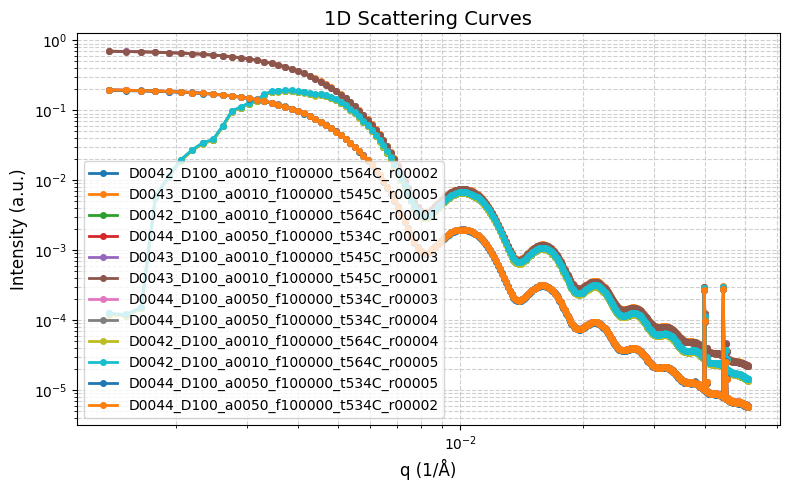

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [5]:
D100_set = make_query(query = "milliron", filter_value='*D100*')

# Example usage:
local_path = '/eagle/projects/XPCS-DATA-DYS'

start_new_plot(title="1D Scattering Curves", logx=True, logy=True)
for qfile in D100_set["gmeta"]:
    result_file, log_file, image_files = parse_result_files(qfile, local_path)
    print(result_file)
    plot_hdf_overlay(
        result_file, 
        x = '/xpcs/qmap/static_v_list_dim0', 
        y = '/xpcs/temporal_mean/scattering_1d',
        label = qfile['entries'][0]['content']['dc']['titles'][0]['title'])

show_plot()


{'q': '', 'limit': 50, 'advanced': True, 'filters': [{'type': 'like', 'field_name': 'dc.titles.title', 'value': '*F0026_GLC*'}]}
Query results: 2
/eagle/projects/XPCS-DATA-DYS/XPCSDATA/Automate/2025-1/milliron202503/rigaku_qmap_Sq360_Dq36_Lin_0501/F0026_GLC_a0010_f100000_t256C_r00001/F0026_GLC_a0010_f100000_t256C_r00001_results.hdf
/eagle/projects/XPCS-DATA-DYS/XPCSDATA/Automate/2025-1/milliron202503/rigaku_qmap_Sq360_Dq36_Lin_0501/F0026_GLC_a0010_f100000_t256C_r00002/F0026_GLC_a0010_f100000_t256C_r00002_results.hdf


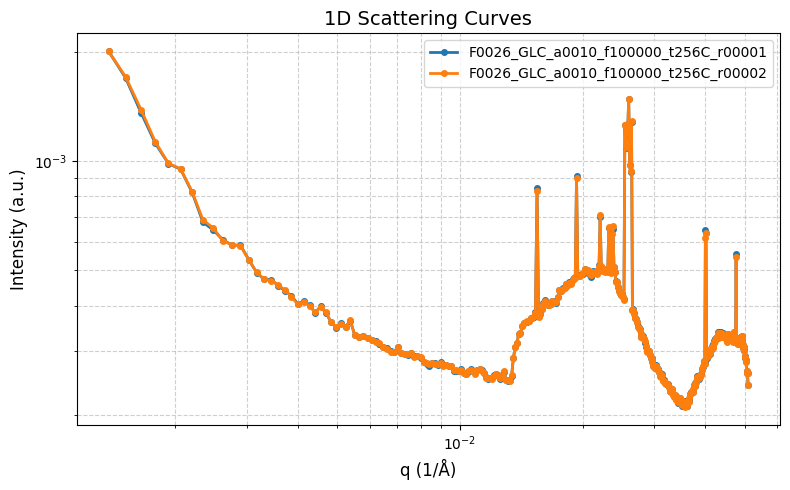

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [6]:
G10_set = make_query(query = "", field_name='dc.titles.title', filter_value='*F0026_GLC*', limit=50)

start_new_plot(title="1D Scattering Curves", logx=True, logy=True)
for qfile in G10_set["gmeta"]:
    result_file, log_file, image_files = parse_result_files(qfile, local_path)
    print(result_file)
    plot_hdf_overlay(
        result_file, 
        x = '/xpcs/qmap/static_v_list_dim0', 
        y = '/xpcs/temporal_mean/scattering_1d',
        label = qfile['entries'][0]['content']['dc']['titles'][0]['title'])

show_plot()

In [7]:
# from metadata import extract_metadata_structure
# from metadata import extract_entry_key_values
# extract_metadata_structure(D100_set)
# extract_entry_key_values(D100_set['gmeta'][0])